In [1]:
import nltk
import spacy
import os
import numpy as np
from nltk.tokenize import RegexpTokenizer
import matplotlib.pylab as plt
from tqdm import tqdm
from nltk.stem.snowball import PorterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize


# Basic Boolean Model

In [3]:
tokenizer = RegexpTokenizer("[a-zA-Z@]+")

In [4]:
fd = os.listdir("/home/uj007/sop/corpora") 

In [5]:
splits = []
for i in range(44):
    split = fd[i*144:(i+1)*144]
    select = np.random.choice(fd, 24)
    splits.append(select)

44*24 = 1056 files are selected and from these we will be further selecting 1000 files

In [6]:
len(splits)

44

In [7]:
len(splits[0])

24

In [8]:
# final docs index to word(token) mapping

class invertedIndex(object):
    def __init__(self,docs):
        self.docs = docs
        self.termList = {}
        self.freqTable = {}
        for key,value in finalDocs.items():
            for term in value:
                if term in self.termList.keys():
                    self.termList[term].add(key)
                else:
                    self.termList[term] = {key}
        for term,ls in self.termList.items():
            self.freqTable[term] = len(ls)
    def search(self,term):
        try:
            return self.termList[term]
        except:
            return "No results"

In [1]:
finalDocs = {} 
i = 0
indexToDoc = {}
for chunks in splits:
    for doc in chunks:
        i+=1 
        f=open("/home/uj007/sop/corpora/"+doc, "r")
        text = f.read()
        text = tokenizer.tokenize(text)
        finalDocs[i] = text
        indexToDoc[i] = doc
        f.close()

# finalDocs[0] 
# type(finalDocs[0][0])

NameError: name 'splits' is not defined

In [10]:
for j in range(1,10):
    print(j)
    print(indexToDoc[j],end=' ')
    print(finalDocs[j][:10])

1
GX079-61-6655408 ['CONSUMER', 'CREDIT', 'EDUCATION', 'CONSUMER', 'FINANCE', 'UNIT', 'Investment', 'Fraud', 'Topic', 'Types']
2
GX248-37-4044388 ['CHAPTER', 'GOVERNMENT', 'SPECIAL', 'DISTRICTS', 'SENATE', 'BILL', 'Digest', 'BY', 'SENATOR', 'Coffman']
3
GX016-37-9328696 ['J', 'E', 'FOGARTY', 'INTERNATIONAL', 'CENTER', 'shim', 'gif', 'About', 'FIC', 'FIC']
4
GX247-92-3309917 ['Department', 'of', 'Natural', 'Resources', 'Honors', 'Marinas', 'For', 'Their', 'Commitment', 'To']
5
GX119-91-12814865 ['Rep', 'Henry', 'Waxman', 'th', 'District', 'of', 'California', 'About', 'Rep', 'Waxman']
6
GX064-67-7187089 ['Skip', 'common', 'site', 'navigation', 'and', 'headers', 'United', 'States', 'Environmental', 'Protection']
7
GX012-96-13133653 ['Civil', 'Air', 'Patrol', 'supports', 'Reserve', 'and', 'National', 'Guard', 'Training', 'For']
8
GX063-05-7523399 ['MEDLINEplus', 'Health', 'Information', 'A', 'service', 'of', 'the', 'National', 'Library', 'of']
9
GX005-06-12795995 ['Guides', 'for', 'the', '

In [11]:
ii = invertedIndex(finalDocs)
# ii.termList

 # Ifull is invertedIndex


In [13]:
ii.freqTable = sorted(ii.freqTable.items(), key = 
             lambda kv:(kv[1], kv[0]),reverse = True) 

# VOCABULARY/DICTIONARY SIZE

In [14]:
print("The size of the vocabulary:")
len(ii.freqTable)

The size of the vocabulary:


117499

# Most frequent words 

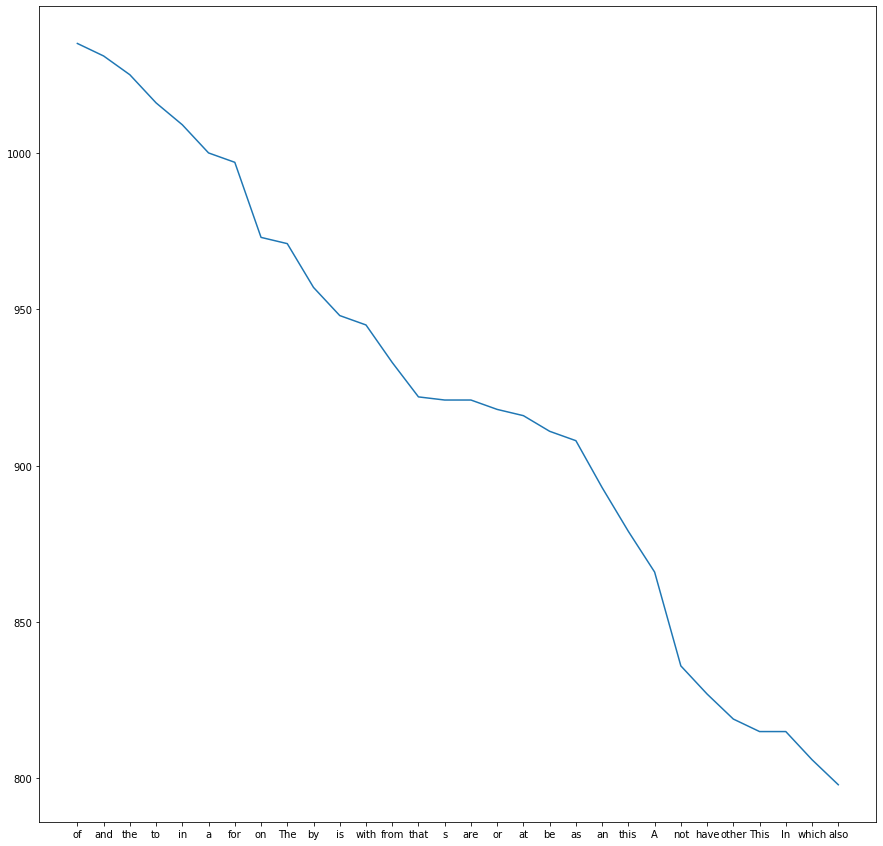

In [15]:
x, y = zip(*ii.freqTable[:30]) # unpack a list of pairs into two tuples
plt.figure(figsize=(15, 15))
plt.plot(x, y)
plt.show()

In [16]:
print("Stop Words based on the frequency: ")
print(ii.freqTable[:30])

Stop Words based on the frequency: 
[('of', 1035), ('and', 1031), ('the', 1025), ('to', 1016), ('in', 1009), ('a', 1000), ('for', 997), ('on', 973), ('The', 971), ('by', 957), ('is', 948), ('with', 945), ('from', 933), ('that', 922), ('s', 921), ('are', 921), ('or', 918), ('at', 916), ('be', 911), ('as', 908), ('an', 893), ('this', 879), ('A', 866), ('not', 836), ('have', 827), ('other', 819), ('This', 815), ('In', 815), ('which', 806), ('also', 798)]


In [17]:
q = open("/home/uj007/sop/query.txt", "r")
text = q.read().split("\n")
q.close()
op = open("/home/uj007/sop/output.txt", "r")
j = op.readlines()
from collections import defaultdict
k_dict = defaultdict(list)
for i in j:
    k_dict[int(i[:3])].append(i)
op.close()

In [18]:
queries = []
for i in range(22):
    query = text[i*3:(i+1)*3]
    select = np.random.choice(query, 2)
    queries.append(select)

In [19]:
queries = np.random.choice(text, 10)

In [20]:
queries[:5]

array(['822  give history battle big horn june 25 26 1876 referred custers stand',
       '741  artificial intelligence',
       '817  naming rights sports stadiums acquired',
       '730  possible complications potential dangers gastric bypass surgery',
       '847  role portugal world war ii'], dtype='<U141')

In [21]:
def or_query(termList, query):
    ored = []
    for st in query.split():
        if st in termList.keys():
            jj = termList[st]
            ored.extend(jj)
        else:
            pass
    return set(ored)

In [22]:
mj = or_query(ii.termList, query[0][3:])
# list(mj)

# function to calculate the kth precision


In [39]:
def kthPrecisionRecall(k, termList, t_m, k_dict,finalDocs):
    
    average_pres = 0.0
    average_recall = 0.0
    for query in t_m:
        #print(query)
        mj = or_query(termList, query[3:])
        #print(mj)
        try:
            outp_num = int(query[:3])
        except:
            continue
        outp_file_list = k_dict[outp_num]
        #print(outp_file_list)
        predicted_file_list = []
        #print(mj)
        try:
            #print(finalDocs["715 GX001-28-5148808 \n"])
            for i in mj:
                temp = indexToDoc[i]
                #print(temp)
                predicted_file_list.append(temp)
            #predicted_file_list.append(indexToDoc[i] for i in mj)
        except ValueError:
            print("OUT")
        #print(predicted_file_list)
        #predicted_file_list = set(predicted_file_list)
        actual_file_list = [i[4:].rstrip() for i in outp_file_list]
        top_k = actual_file_list[:k]
        rel_num = len(list(set(predicted_file_list).intersection(top_k)))
        tr_num = len(list(set(predicted_file_list).intersection(actual_file_list)))
        if len(top_k) == 0:
            continue
        recall = (rel_num*1.0)/(len(top_k))
        precision = (rel_num*1.0)/(len(predicted_file_list))
        print("RECALL")
        print(recall)
        print("PRECISION")
        print(precision)
        
        average_pres += precision
        average_recall += recall
        #break
        
        
    average_pres /= 10
    average_recall /= 10
    print("AVERAGE RECALL")
    print(average_recall)
    print("AVERAGE PRECISION")
    print(average_pres)

# Calls to the kthLevelPrecision


In [41]:
kthPrecisionRecall(5, ii.termList, queries, k_dict,finalDocs)

RECALL
0.2
PRECISION
0.0017064846416382253
RECALL
0.0
PRECISION
0.0
RECALL
0.4
PRECISION
0.007194244604316547
RECALL
0.2
PRECISION
0.0017605633802816902
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.2
PRECISION
0.020833333333333332
RECALL
0.2
PRECISION
0.0017605633802816902
RECALL
0.4
PRECISION
0.0030959752321981426
AVERAGE RECALL
0.16
AVERAGE PRECISION
0.003635116457204963


In [42]:
kthPrecisionRecall(10, ii.termList, queries, k_dict,finalDocs)

RECALL
0.1
PRECISION
0.0017064846416382253
RECALL
0.0
PRECISION
0.0
RECALL
0.4
PRECISION
0.014388489208633094
RECALL
0.1
PRECISION
0.0017605633802816902
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.1
PRECISION
0.020833333333333332
RECALL
0.3
PRECISION
0.00528169014084507
RECALL
0.2
PRECISION
0.0030959752321981426
AVERAGE RECALL
0.12
AVERAGE PRECISION
0.004706653593692956


In [45]:
kthPrecisionRecall(15, ii.termList, queries, k_dict,finalDocs)

RECALL
0.06666666666666667
PRECISION
0.0017064846416382253
RECALL
0.06666666666666667
PRECISION
0.01098901098901099
RECALL
0.4
PRECISION
0.02158273381294964
RECALL
0.06666666666666667
PRECISION
0.0017605633802816902
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.0
PRECISION
0.0
RECALL
0.06666666666666667
PRECISION
0.020833333333333332
RECALL
0.26666666666666666
PRECISION
0.007042253521126761
RECALL
0.13333333333333333
PRECISION
0.0030959752321981426
AVERAGE RECALL
0.10666666666666666
AVERAGE PRECISION
0.006701035491053877


# Using Stemming and precision for the improvements 

We have used stemming to increase recall
We have used lemmatization to increase precision

# stemming

In [ ]:
ps = PorterStemmer()

In [44]:
type(ps.stem("jumped"))

str

In [30]:
splits

[array(['GX079-61-6655408', 'GX248-37-4044388', 'GX016-37-9328696',
        'GX247-92-3309917', 'GX119-91-12814865', 'GX064-67-7187089',
        'GX012-96-13133653', 'GX063-05-7523399', 'GX005-06-12795995',
        'GX243-15-12358975', 'GX179-52-13684519', 'GX082-48-9500832',
        'GX001-28-14093471', 'GX099-85-1388511', 'GX008-20-0246657',
        'GX260-37-11385090', 'GX269-16-11472617', 'GX244-32-2506498',
        'GX262-41-3547244', 'GX249-56-13649060', 'GX000-75-12829778',
        'GX169-26-5036244', 'GX239-70-3162917', 'GX267-44-14785654'],
       dtype='<U17'),
 array(['GX000-55-3026780', 'GX021-46-0346939', 'GX000-66-4641344',
        'GX010-62-15446345', 'GX133-73-2007928', 'GX058-21-0044283',
        'GX269-59-14508085', 'GX230-72-12721551', 'GX263-24-0198074',
        'GX230-03-3917681', 'GX248-39-2339011', 'GX094-30-3520563',
        'GX040-56-6339184', 'GX262-69-1374312', 'GX219-74-12797241',
        'GX021-99-14391754', 'GX226-08-4483411', 'GX260-32-1267763',
        '

In [81]:
class inverted_index(object):
    def __init__(self):
        self.termList2=[]
        self.freqList2=[]
        self.docList2=[]

In [82]:
def make_invert(termList, docList, word_tokens, idx):
    for index, word in enumerate(word_tokens):
        if word in termList:
            i = termList.index(word)
            if idx not in docList[i]:
                docList[i].append(idx)
                
        else:
            termList.append(word)
            docList.append([idx])

In [118]:
import random
keys = list(finalDocs)
values = [finalDocs[k] for k in keys]

In [168]:
file_name = "sop/corpora.zip"
req_doc = []
docs = {}
bk_sz = 1050

import zipfile
from zipfile import ZipFile

def separateFile(file_name, modulus, remainder, req_doc):
    with ZipFile(file_name, 'r') as zip:
        
        for k, file in enumerate(zip.infolist()):
            if(k%modulus == remainder):
                data = zip.read(file.filename)
                
                req_doc.append(data)
                docs[file.filename] = req_doc.index(data)
                if(len(req_doc) == bk_sz):
                    break

c=0
while(True):
    
    separateFile(file_name, 90, c, req_doc)
    print(len(req_doc))
    if(len(req_doc) == bk_sz):
                    break
    c = c+1
    

71
142
213
284
355
426
497
568
639
710
781
852
923
994
1050


In [175]:
def inv_stem(ind):
    ps=PorterStemmer()
    iterator = 0
    for j,i in enumerate(indexToDoc.keys()):
        iterator += 1
        a = sent_tokenize(req_doc[i].decode('utf-8'))
        #print(indexToDoc)
        #a = values[j]
        #print("For loop of size". len(a))
        for k,m in enumerate(a):
            w = word_tokenize(a[k].lower())
            w = [ps.stem(word.lower()) for word in w if word.isalpha() and word not in sw]
            make_invert(ind.termList2, ind.docList2,w,list(indexToDoc.keys())[j])
    
        print(iterator, " done")


In [176]:
ip=inverted_index()
ir=inverted_index()
from nltk.corpus import stopwords
sw=set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer

Inverted Index after stemming


In [177]:
inv_stem(ir)

1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done
80  done
81  done
82  done
83  done
84  done
85  done
86  done
87  done
88  done
89  done
90  done
91  done
92  done
93  done
94  done
95  done
96  done
97  done
98  done
99  done
100  done
101  done
102  done
103  done
104  done
105  done
106  done
107  done
108  done
109  done
110  done
111  don

IndexError: list index out of range

In [188]:
def or_query1(termList, docList, query):
    ored = []
    for st in query.split():
        try:
            jj = docList[termList.index(st)]
            ored.extend(jj)
        except ValueError:
            pass
       

   
    return set(ored)

In [195]:
ps = PorterStemmer()


s_query = []

for i in queries:
    st2 = " "
    st = [ps.stem(j.lower()) for j in i.split()]
    s_query.append(st2.join(st))
    
#s_query

In [226]:
def kthPrecisionRecall1(k, termList, docList, t_m, k_dict):
    
    average_pres = 0.0
    average_recall = 0.0
    for query in t_m:
        mj = list(or_query1(termList, docList, query[3:]))
        #print(mj)
        print("Query ",query)
        outp_num = int(query[:3])
        outp_file_list = k_dict[outp_num]
        predicted_file_list = []
        #print(mj)
        try:
            #print(finalDocs["715 GX001-28-5148808 \n"])
            for i in mj:
                temp = indexToDoc[i]
                #print(temp)
                predicted_file_list.append(temp)
            #predicted_file_list.append(indexToDoc[i] for i in mj)
        except ValueError:
            print("OUT")
        #print(predicted_file_list)
        actual_file_list = [i[4:].rstrip() for i in outp_file_list]
        top_k = actual_file_list[:k]
        rel_num = len(list(set(predicted_file_list).intersection(top_k)))
        tr_num = len(list(set(predicted_file_list).intersection(actual_file_list)))

        recall = (rel_num*1.0)/(len(top_k))
        if len(predicted_file_list) == 0:
            continue
        precision = (rel_num*1.0)/(len(predicted_file_list))
        print("RECALL")
        print(recall)
        print("PRECISION")
        print(precision)
        
        average_pres += precision
        average_recall += recall
        
        
    average_pres /= 10
    average_recall /= 10
    print("AVERAGE RECALL")
    print(average_recall)
    print("AVERAGE PRECISION")
    print(average_pres)

# Decrease in dictionary/vocabulary size due to stemming

In [209]:
print("Dictionary size after stemming: ",len(ir.termList2))

Dictionary size after stemming:  62073


ir denotes indexRecall

In [210]:
kthPrecisionRecall1(5, ir.termList2, ir.docList2, s_query, k_dict)

Query  822 give histori battl big horn june 25 26 1876 refer custer stand
RECALL
0.2
PRECISION
0.0012285012285012285
Query  741 artifici intellig
RECALL
0.0
PRECISION
0.0
Query  817 name right sport stadium acquir
RECALL
0.2
PRECISION
0.0016286644951140066
Query  730 possibl complic potenti danger gastric bypass surgeri
RECALL
0.2
PRECISION
0.0015822784810126582
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  752 dam remov environment impact
RECALL
0.0
PRECISION
0.0
Query  849 scalabl vector graphic
RECALL
0.0
PRECISION
0.0
Query  792 social secur mean test
RECALL
0.2
PRECISION
0.0013774104683195593
Query  770 state kyrgyzstan unit state relat
RECALL
0.4
PRECISION
0.002178649237472767
AVERAGE RECALL
0.12000000000000002
AVERAGE PRECISION
0.0007995503910420219


In [211]:
kthPrecisionRecall1(10, ir.termList2, ir.docList2, s_query, k_dict)

Query  822 give histori battl big horn june 25 26 1876 refer custer stand
RECALL
0.1
PRECISION
0.0012285012285012285
Query  741 artifici intellig
RECALL
0.0
PRECISION
0.0
Query  817 name right sport stadium acquir
RECALL
0.1
PRECISION
0.0016286644951140066
Query  730 possibl complic potenti danger gastric bypass surgeri
RECALL
0.1
PRECISION
0.0015822784810126582
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  752 dam remov environment impact
RECALL
0.0
PRECISION
0.0
Query  849 scalabl vector graphic
RECALL
0.0
PRECISION
0.0
Query  792 social secur mean test
RECALL
0.3
PRECISION
0.004132231404958678
Query  770 state kyrgyzstan unit state relat
RECALL
0.2
PRECISION
0.002178649237472767
AVERAGE RECALL
0.08
AVERAGE PRECISION
0.0010750324847059339


In [212]:
kthPrecisionRecall1(15, ir.termList2, ir.docList2, s_query, k_dict)

Query  822 give histori battl big horn june 25 26 1876 refer custer stand
RECALL
0.06666666666666667
PRECISION
0.0012285012285012285
Query  741 artifici intellig
RECALL
0.0
PRECISION
0.0
Query  817 name right sport stadium acquir
RECALL
0.06666666666666667
PRECISION
0.0016286644951140066
Query  730 possibl complic potenti danger gastric bypass surgeri
RECALL
0.06666666666666667
PRECISION
0.0015822784810126582
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  752 dam remov environment impact
RECALL
0.0
PRECISION
0.0
Query  849 scalabl vector graphic
RECALL
0.0
PRECISION
0.0
Query  792 social secur mean test
RECALL
0.2
PRECISION
0.004132231404958678
Query  770 state kyrgyzstan unit state relat
RECALL
0.13333333333333333
PRECISION
0.002178649237472767
AVERAGE RECALL
0.05333333333333333
AVERAGE PRECISION
0.0010750324847059339


#  Lemmatization"

In [215]:
def inv_lemmatize(ind):
    l=WordNetLemmatizer()
    iterator = 0
    for j,i in enumerate(indexToDoc.keys()):
        iterator += 1
        a = sent_tokenize(req_doc[i].decode('utf-8'))
        #print(indexToDoc)
        #a = values[j]
        #print("For loop of size". len(a))
        for k,m in enumerate(a):
            w = word_tokenize(a[k].lower())
            w = [l.lemmatize(word.lower()) for word in w if word.isalpha() and word not in sw]
            make_invert(ind.termList2, ind.docList2,w,list(indexToDoc.keys())[j])
    
        print(iterator, " done")

Inverted Index after lemmatization

In [222]:
inv_lemmatize(ip)

1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done
56  done
57  done
58  done
59  done
60  done
61  done
62  done
63  done
64  done
65  done
66  done
67  done
68  done
69  done
70  done
71  done
72  done
73  done
74  done
75  done
76  done
77  done
78  done
79  done
80  done
81  done
82  done
83  done
84  done
85  done
86  done
87  done
88  done
89  done
90  done
91  done
92  done
93  done
94  done
95  done
96  done
97  done
98  done
99  done
100  done
101  done
102  done
103  done
104  done
105  done
106  done
107  done
108  done
109  done
110  done
111  don

IndexError: list index out of range

In [245]:
print("Dictionary size after lemmatization: ",len(ip.termList2))

Dictionary size after lemmatization:  76710


In [227]:
kthPrecisionRecall1(5, ip.termList2, ip.docList2, s_query, k_dict)

Query  822 give histori battl big horn june 25 26 1876 refer custer stand
RECALL
0.0
PRECISION
0.0
Query  741 artifici intellig
Query  817 name right sport stadium acquir
RECALL
0.2
PRECISION
0.0017605633802816902
Query  730 possibl complic potenti danger gastric bypass surgeri
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  752 dam remov environment impact
RECALL
0.0
PRECISION
0.0
Query  849 scalabl vector graphic
RECALL
0.0
PRECISION
0.0
Query  792 social secur mean test
RECALL
0.0
PRECISION
0.0
Query  770 state kyrgyzstan unit state relat
RECALL
0.4
PRECISION
0.0023121387283236996
AVERAGE RECALL
0.06000000000000001
AVERAGE PRECISION
0.00040727021086053893


In [228]:
kthPrecisionRecall1(10, ip.termList2, ip.docList2, s_query, k_dict)

Query  822 give histori battl big horn june 25 26 1876 refer custer stand
RECALL
0.0
PRECISION
0.0
Query  741 artifici intellig
Query  817 name right sport stadium acquir
RECALL
0.1
PRECISION
0.0017605633802816902
Query  730 possibl complic potenti danger gastric bypass surgeri
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  752 dam remov environment impact
RECALL
0.0
PRECISION
0.0
Query  849 scalabl vector graphic
RECALL
0.0
PRECISION
0.0
Query  792 social secur mean test
RECALL
0.1
PRECISION
0.001644736842105263
Query  770 state kyrgyzstan unit state relat
RECALL
0.2
PRECISION
0.0023121387283236996
AVERAGE RECALL
0.04
AVERAGE PRECISION
0.0005717438950710652


In [229]:
# Ifull is invertedIndex
kthPrecisionRecall1(15, ip.termList2, ip.docList2, s_query, k_dict)

Query  822 give histori battl big horn june 25 26 1876 refer custer stand
RECALL
0.0
PRECISION
0.0
Query  741 artifici intellig
Query  817 name right sport stadium acquir
RECALL
0.06666666666666667
PRECISION
0.0017605633802816902
Query  730 possibl complic potenti danger gastric bypass surgeri
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  847 role portug world war ii
RECALL
0.0
PRECISION
0.0
Query  752 dam remov environment impact
RECALL
0.0
PRECISION
0.0
Query  849 scalabl vector graphic
RECALL
0.0
PRECISION
0.0
Query  792 social secur mean test
RECALL
0.06666666666666667
PRECISION
0.001644736842105263
Query  770 state kyrgyzstan unit state relat
RECALL
0.13333333333333333
PRECISION
0.0023121387283236996
AVERAGE RECALL
0.026666666666666665
AVERAGE PRECISION
0.0005717438950710652


Justification for using stemming and lemmatization for increasing recall and stemming 
 
For grammatical reasons, documents are going to use different forms of a word, such as organize, organizes, and organizing. Additionally, there are families of derivationally related words with similar meanings, such as democracy, democratic, and democratization. In many situations, it seems as if it would be useful for a search for one of these words to return documents that contain another word in the set.
 
The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
 
 
Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.
 
For instance:
 
The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
 
The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.
 
The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.
 
he real difference between stemming and lemmatization is threefold:
 
Stemming reduces word-forms to (pseudo)stems, whereas lemmatization reduces the word-forms to linguistically valid lemmas. This difference is apparent in languages with more complex morphology, but may be irrelevant for many IR applications;
 
Lemmatization deals only with inflectional variance, whereas stemming may also deal with derivational variance;
 
In terms of implementation, lemmatization is usually more sophisticated (especially for morphologically complex languages) and usually requires some sort of lexica. Satisfatory stemming, on the other hand, can be achieved with rather simple rule-based approaches.
 
Lemmatization may also be backed up by a part-of-speech tagger in order to disambiguate homonyms.


In [236]:
totalLen1 = 0 
for v in ii.freqTable:
     totalLen1 += int(v[1])
    

In [237]:
print(totalLen1)

1148655


In [246]:
totalLen1 = 0 
for v in ip.termList2:
     totalLen1 += len(v)
    

In [247]:
print(totalLen1)

589807


In [248]:
totalLen1 = 0 
for v in ir.termList2:
     totalLen1 += len(v)
    

In [249]:
print(totalLen1)

425734
